### Importação de bibliotecas


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

from collections import Counter
from itertools import combinations
import warnings

warnings.filterwarnings('ignore')

from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Leitura dos dados
- Dados provenientes do site Kaggle
- https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
- Dataset previamente dividido em treino e teste

In [2]:
cellphone_data_train = pd.read_csv('cellphone-data-train.csv')
cellphone_data_test = pd.read_csv('cellphone-data-test.csv')

### Dicionário de dados

<div>
    <table>
  <tr>
    <th><span>battery_power:</span></th>
    <th><span>blue:</span></th>
    <th><span>clock_speed:</span></th>
    <th><span>dual_sim:</span></th>
    <th><span>fc:</span></th>
    <th><span>four_g:</span></th>
    <th><span>int_memory:</span></th>
  </tr>
  <tr>
    <td>Total energy a battery can store in one time measured in mAh</td>
    <td>Has bluetooth or not</td>
    <td>speed at which microprocessor executes instructions</td>
    <td>Has dual sim support or not</td>
    <td>Front Camera mega pixels</td>
    <td>Has 4G or not</td>
    <td>Internal Memory in Gigabytes</td>
  </tr>
  <tr>
    <th><span>m_dep:</span></th>
    <th><span>mobile_wt:</span></th>
    <th><span>n_cores:</span></th>
    <th><span>pc:</span></th>
    <th><span>px_height:</span></th>
    <th><span>px_width:</span></th>
    <th><span>ram:</span></th>
  </tr>
  <tr>
    <td>Mobile Depth in cm</td>
    <td>Weight of mobile phone</td>
    <td>Number of cores of processor</td>
    <td>Primary Camera mega pixels</td>
    <td>Pixel Resolution Height</td>
    <td>Pixel Resolution Width</td>
    <td>Random Access Memory in Mega Bytes</td>
  </tr>
  <tr>
    <th><span>sc_h:</span></th>
    <th><span>sc_w:</span></th>
    <th><span>talk_time:</span></th>
    <th><span>three_g:</span></th>
    <th><span>touch_screen:</span></th>
    <th><span>wifi:</span></th>
    <th><span>price_range:</span></th>
  </tr>
  <tr>
    <td>Screen Height of mobile in cm</td>
    <td>Screen Width of mobile in cm</td>
    <td>longest time that a single battery charge will last when you are</td>
    <td>Has 3G or not</td>
    <td>Has touch screen or not</td>
    <td>Has wifi or not</td>
    <td>This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).</td>
  </tr>
</table>
</div>

### Visualização dos 5 primeiros registros (dataset de treino)

In [3]:
cellphone_data_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Visualização dos 5 últimos registros (dataset de treino)

In [4]:
cellphone_data_train.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


### Exibição de informações
1. Informações sobre detalhes do Dataframe como, quantidade de entradas, tipos de dados, etc. (*info()*)
2. Dados de estatística descritiva acerca dos dados contidos no Dataframe (*describe()*)

In [5]:
# Basic information
cellphone_data_train.info()

# Describe the data
cellphone_data_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Exibição das colunas de atributos (features) do dataset

In [7]:
cellphone_data_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### Pré-processamento inicial dos dados com objetivo de visualização dos dados numéricos e categóricos

In [13]:
cellphone_train = cellphone_data_train.astype({'blue':'object'})

cellphone_train['blue'].replace({0:'No', 1:'Yes'}, inplace=True)
cellphone_train['wifi'].replace({0:'No', 1:'Yes'}, inplace=True)
cellphone_train['four_g'].replace({0:'No', 1:'Yes'}, inplace=True)
cellphone_train['three_g'].replace({0:'No', 1:'Yes'}, inplace=True)
cellphone_train['touch_screen'].replace({0:'No', 1:'Yes'}, inplace=True)
cellphone_train['dual_sim'].replace({0:'No', 1:'Yes'}, inplace=True)
cellphone_train['price_range'].replace({0:'low_cost', 1:'medium_cost', 2:'high_cost', 3:'very_high_cost'}, inplace=True)

In [14]:
cellphone_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,No,2.2,No,1,No,7,0.6,188,2,...,20,756,2549,9,7,19,No,No,Yes,medium_cost
1,1021,Yes,0.5,Yes,0,Yes,53,0.7,136,3,...,905,1988,2631,17,3,7,Yes,Yes,No,high_cost
2,563,Yes,0.5,Yes,2,Yes,41,0.9,145,5,...,1263,1716,2603,11,2,9,Yes,Yes,No,high_cost
3,615,Yes,2.5,No,0,No,10,0.8,131,6,...,1216,1786,2769,16,8,11,Yes,No,No,high_cost
4,1821,Yes,1.2,No,13,Yes,44,0.6,141,2,...,1208,1212,1411,8,2,15,Yes,Yes,No,medium_cost


In [10]:
cellphone_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   object 
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   object 
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   object 
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   object 
 18  touch_sc

### Criação de duas listas contendo rótulos de colunas
- A primeira especificando quais colunas contém dados dados numéricos (int, float)
- A segunda especificando quais colunas contém dados categóricos (classes distintas)

In [15]:
numerical_features = [i for i in cellphone_train.columns if cellphone_train[i].dtype != 'object']
categorical_features = [i for i in cellphone_train.columns if cellphone_train[i].dtype == 'object']

In [16]:
numerical_features

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

In [17]:
categorical_features

['blue',
 'dual_sim',
 'four_g',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

### Função para plotar gráficos a partir dos dados de cada coluna com dados categóricos
- Estes gráficos vão exibir a contagem de registros de cada categoria existente em cada uma das features (colunas)

**Obs.: o gráfico de barras é uma forma de vizualização de dados discretos (número finito ou infinito contável de valores)**

In [18]:
def bar_plot(variable):
    """
        input: variable eg: "blue"
        output: barplot & count value
    """
    # Taking feature
    var = cellphone_train[variable]
    
    # count number of categorical variable
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel('Contagem')
    plt.title(variable)
    plt.show()
    print('{}: \n {} '.format(variable, varValue))

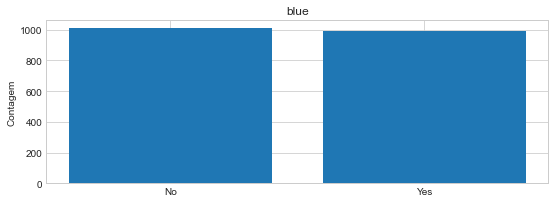

blue: 
 No     1010
Yes     990
Name: blue, dtype: int64 


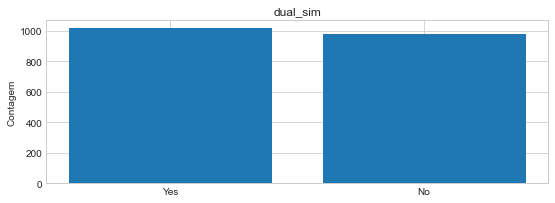

dual_sim: 
 Yes    1019
No      981
Name: dual_sim, dtype: int64 


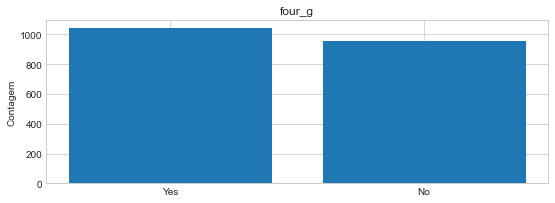

four_g: 
 Yes    1043
No      957
Name: four_g, dtype: int64 


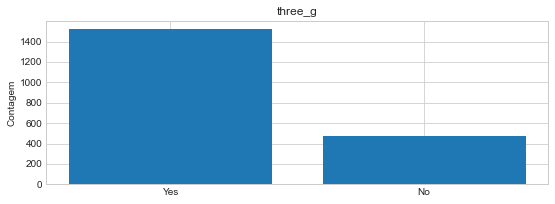

three_g: 
 Yes    1523
No      477
Name: three_g, dtype: int64 


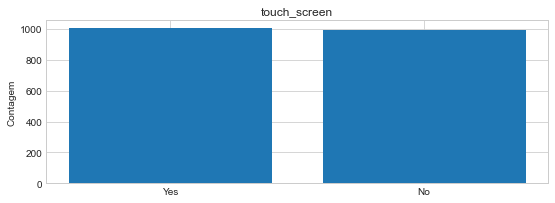

touch_screen: 
 Yes    1006
No      994
Name: touch_screen, dtype: int64 


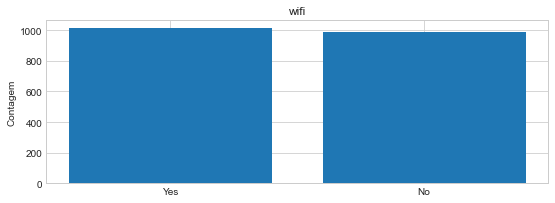

wifi: 
 Yes    1014
No      986
Name: wifi, dtype: int64 


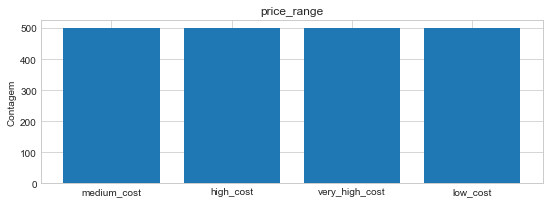

price_range: 
 medium_cost       500
high_cost         500
very_high_cost    500
low_cost          500
Name: price_range, dtype: int64 


In [19]:
for i in categorical_features:
    bar_plot(i)

### Função para plotar gráficos a partir dos dados de cada coluna com dados numéricos
- Estes gráficos vão exibir tendências e/ou dispersão/distribuição dos números constantes nos registros de cada feature (coluna)

**Obs.:o histograma é uma forma de visualização de dados contínuos (podem assumir um número infinito de valores)**

In [20]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(cellphone_train[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel('Frequência')
    plt.title('Distribuição de {} com histogramas'.format(variable))
    plt.show()

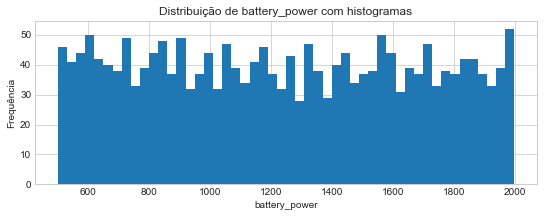

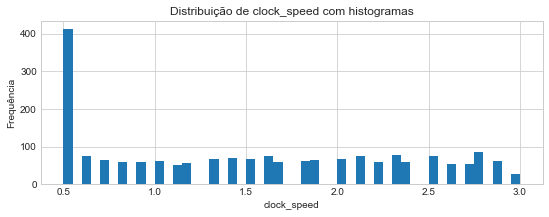

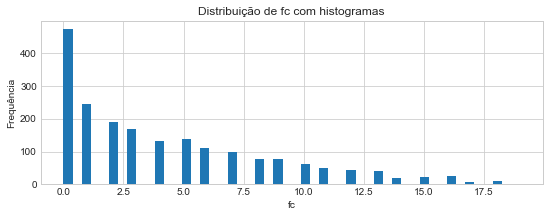

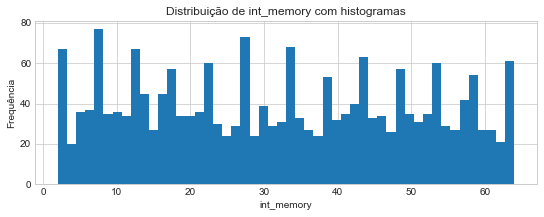

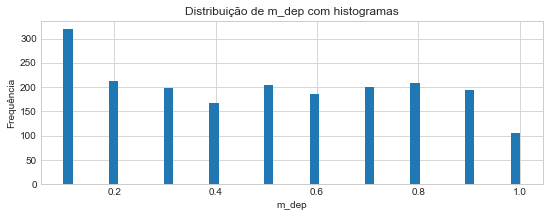

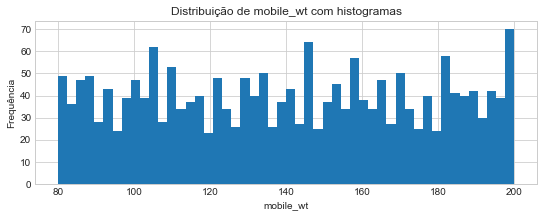

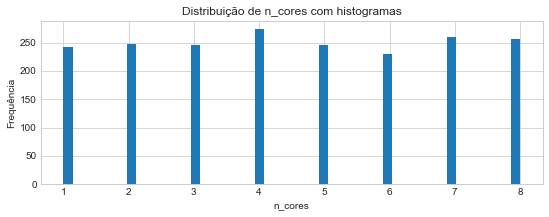

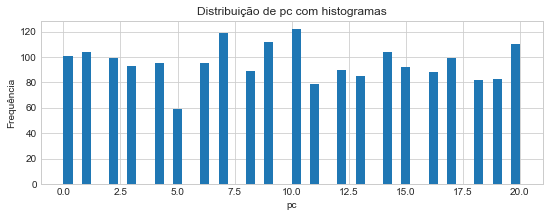

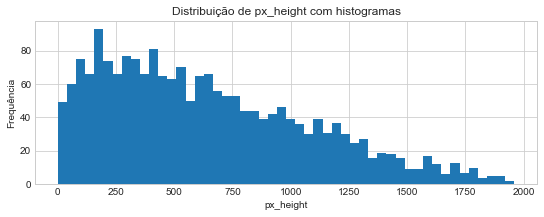

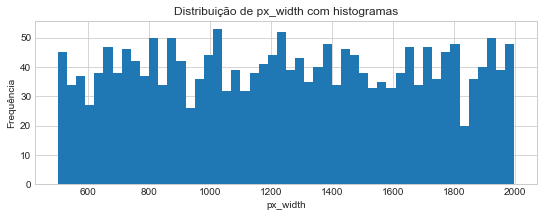

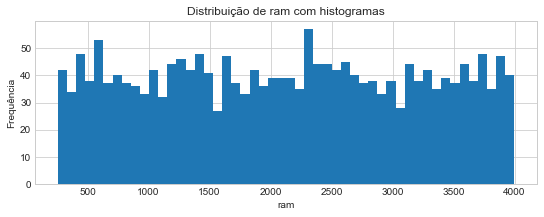

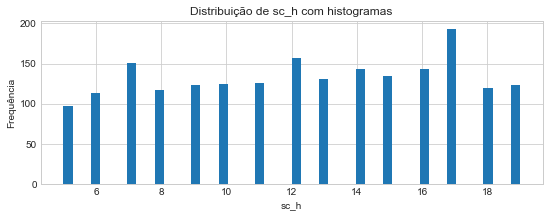

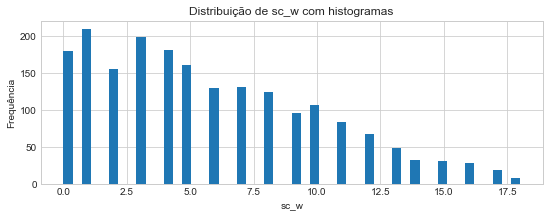

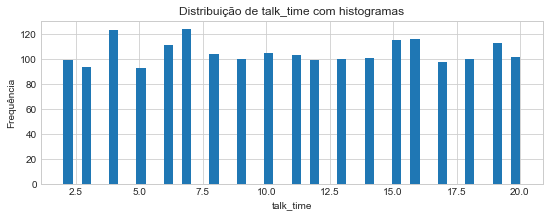

In [21]:
for i in numerical_features:
    plot_hist(i)

### Função para detecção de Outliers 

In [24]:
def outliers(df, columns):
    for col in columns:
        q3 = np.percentile(df[col], 75)
        q1 = np.percentile(df[col], 25)
        mean = np.mean(df[col])
        iqr = q3 - q1
        ls = q3 + 1.5 * iqr
        li = q1 - 1.5 * iqr
        
        # quantidade de outliers
        nr_outliers = df.loc[(df[col] < li) | (df[col] > ls)].shape[0]
        
        print(f'{col:<25}: {nr_outliers}')

### Features que contêm outliers

In [26]:
outliers(cellphone_data_train, numerical_features)

battery_power            : 0
clock_speed              : 0
fc                       : 18
int_memory               : 0
m_dep                    : 0
mobile_wt                : 0
n_cores                  : 0
pc                       : 0
px_height                : 2
px_width                 : 0
ram                      : 0
sc_h                     : 0
sc_w                     : 0
talk_time                : 0


### Concatenando os datasets, gerando um único dataset com os dados de treinamento e teste

In [27]:
concatDf = pd.concat([cellphone_data_train,cellphone_data_test], axis=0).reset_index(drop=True)

In [28]:
concatDf.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,id
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1.0,NaN
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2.0,NaN
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2.0,NaN
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2.0,NaN
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1.0,NaN


In [29]:
concatDf.columns[concatDf.isnull().any()]

Index(['price_range', 'id'], dtype='object')

In [30]:
concatDf.isnull().sum()

battery_power       0
blue                0
clock_speed         0
dual_sim            0
fc                  0
four_g              0
int_memory          0
m_dep               0
mobile_wt           0
n_cores             0
pc                  0
px_height           0
px_width            0
ram                 0
sc_h                0
sc_w                0
talk_time           0
three_g             0
touch_screen        0
wifi                0
price_range      1000
id               2000
dtype: int64

In [31]:
cellphone_data_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### Considerações:
        - 1000 registros com valores Nan na coluna price_range do dataset de teste
        - 2000 registros com valores Nan na coluna id do dataset de teste

### Verificando quais registros contém valores Nan da feature price_range

In [32]:
concatDf[concatDf['price_range'].isnull()]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,id
2000,1043,1,1.8,1,14,0,5,0.1,193,3,...,1412,3476,12,7,2,0,1,0,NaN,1.0
2001,841,1,0.5,1,4,1,61,0.8,191,5,...,857,3895,6,0,7,1,0,0,NaN,2.0
2002,1807,1,2.8,0,1,0,27,0.9,186,3,...,1366,2396,17,10,10,0,1,1,NaN,3.0
2003,1546,0,0.5,1,18,1,25,0.5,96,8,...,1752,3893,10,0,7,1,1,0,NaN,4.0
2004,1434,0,1.4,0,11,1,49,0.5,108,6,...,810,1773,15,8,7,1,0,1,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1700,1,1.9,0,0,1,54,0.5,170,7,...,913,2121,14,8,15,1,1,0,NaN,996.0
2996,609,0,1.8,1,0,0,13,0.9,186,4,...,1632,1933,8,1,19,0,1,1,NaN,997.0
2997,1185,0,1.4,0,1,1,8,0.5,80,1,...,825,1223,5,0,14,1,0,0,NaN,998.0
2998,1533,1,0.5,1,0,0,50,0.4,171,2,...,832,2509,15,11,6,0,1,0,NaN,999.0


### Verificando quais registros contém valores Nan da feature id

In [33]:
concatDf[concatDf['id'].isnull()]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,id
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1.0,NaN
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2.0,NaN
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2.0,NaN
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2.0,NaN
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0.0,NaN
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2.0,NaN
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3.0,NaN
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0.0,NaN


### Gerando gráfico boxplot relacionando capacidade de bateria e  velocidade clock

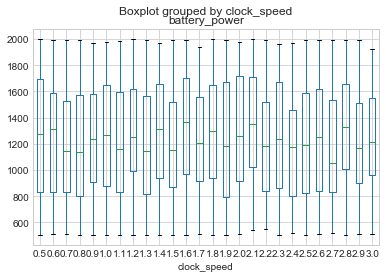

In [34]:
concatDf.boxplot(column='battery_power', by='clock_speed')
plt.show()

### Gerando gráfico boxplot relacionando capacidade de bateria e  fc

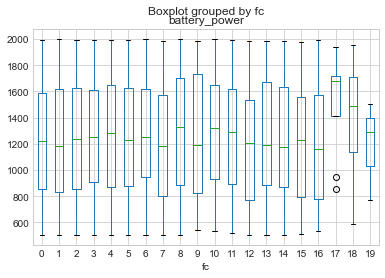

In [36]:
concatDf.boxplot(column='battery_power', by='fc')
plt.show()

### Gráfico de dispersão

In [37]:
def scatter_plot(x_axis,y_axis):
    x = np.array(cellphone_data_train[x_axis])
    y = np.array(cellphone_data_train[y_axis])
    
    plt.scatter(x,y)
    plt.title('Gráfico de Dispersão \n {} x {} '.format(x_axis, y_axis))
    plt.show()

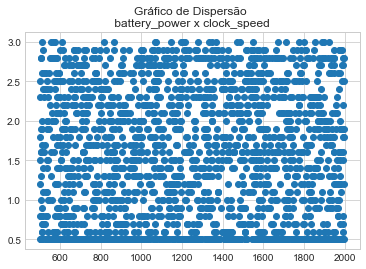

In [41]:
scatter_plot('battery_power','clock_speed')

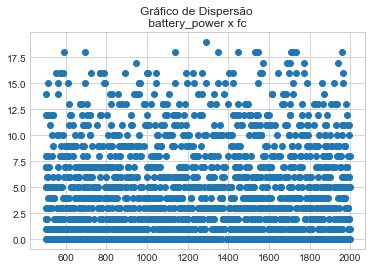

In [42]:
scatter_plot('battery_power','fc')

### Procedimentos adicionais

In [46]:
df = cellphone_data_train.copy()

### Histograma de cada feature numérica

In [47]:
def plot_histograms(df):
    fig, axs = plt.subplots(5,3,figsize=(18,15))
    for i,nf in enumerate(numerical_features):
        axs[i//3, i%3].hist(df[nf])
        axs[i//3, i%3].set_title(nf)

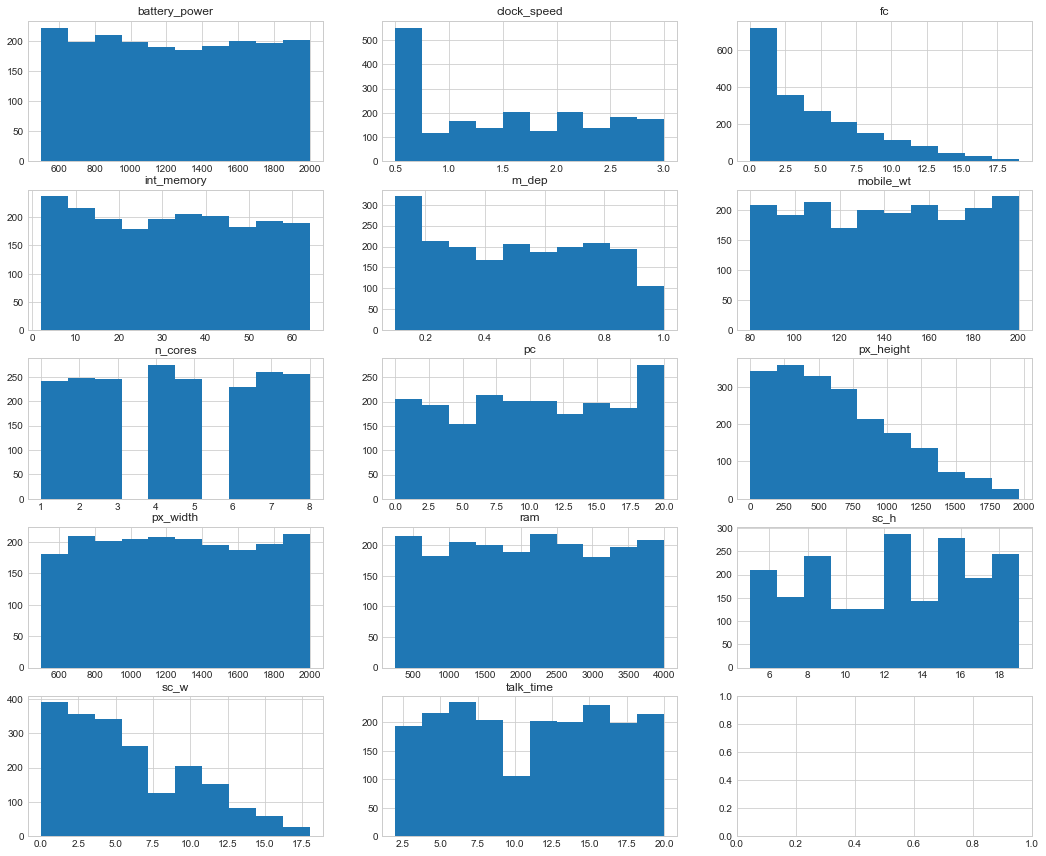

In [48]:
plot_histograms(df)